In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
# from image_loader import image_transforms
# from image_loader import images_from_dir
# from image_loader import image_data_loader
from image_loader import dir_loader_stack
from image_loader import csv_loader_stack
from image_loader import image_plot

# Model Functions
from resnet50 import Resnet50_pretrained

from model_helpers import train
from model_helpers import predict


# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

### Data From CSV Example

In [2]:
# Labels from CSV

df_lab = pd.read_csv('../datasets/animals/labels.csv')
df_lab.head()


,FilePath,Label
0,cats/cats_00072.jpg,cat
1,cats/cats_00073.jpg,cat
2,cats/cats_00074.jpg,cat
3,cats/cats_00075.jpg,cat
4,cats/cats_00076.jpg,cat


In [3]:
df_lab.shape

(2850, 2)

In [4]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = '../datasets/animals/'

# # Set subfolders for train, val & test
# train_dir = os.path.join(data_dir, 'train/')
# val_dir = os.path.join(data_dir, 'valid/')
# test_dir = os.path.join(data_dir, 'test/')

In [5]:
# train test split
# Train & val


In [12]:
train_loader = csv_loader_stack(data_dir,df_lab, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,True)

# val_loader = dir_loader_stack(val_dir, img_size,
#                                batch_size, num_workers)

# test_loader = NEED HOLDOUT SET


data_loaders = {
    'train':train_loader,
    'valid':val_loader,
    'test':test_loader,
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


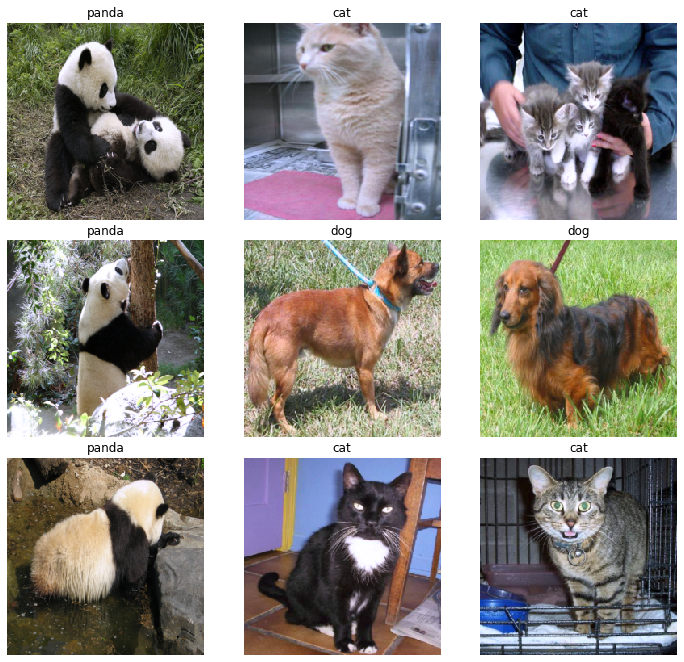

In [13]:
image_plot(train_loader)

### Create Model

In [ ]:
# Model Parms
num_classes = 3
device = 'cuda'

In [ ]:
# create model from object

In [ ]:
res_model = Resnet50_pretrained(num_classes)

In [ ]:
res_model = res_model.build()

### Train Model

In [ ]:
# Train Params
n_epochs = 1
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [ ]:
# train the model
model_transfer = res_model.train(n_epochs, data_loaders, optimizer_transfer, criterion_transfer, 'model_transfer.pt')



### Save Model

In [14]:
# TODO Create model method

### Load Model


In [15]:
# TODO Create model method

# load the model that got the best validation accuracy (uncomment the line below)
# res_model.load_state_dict(torch.load('model_transfer_dog_breeds.pt'))
# res_model.eval()

### Test Model

In [ ]:
# get images image folder
images = glob.glob("images/*")

In [ ]:
for image in images:
    predict(res_model,image,device)